<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

**Importing the dataset**

In [47]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
df.shape

(400, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [50]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})


In [53]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [54]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [67]:
x=df.drop(columns=['User ID','Purchased','Gender'],axis=1)

y=df['Purchased']

**Splitting the dataset into the Training set and Test set**

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

print(x.shape,x_train.shape,x_test.shape)

(400, 2) (320, 2) (80, 2)


**Feature Scaling**

In [69]:
scaler=StandardScaler()

scaler.fit_transform(x_train,x_test)


array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

**Fitting Decision Tree Classification to the Training set**

In [70]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)

model.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [71]:
predict_test=model.predict(x_test)


**Making the Confusion Matrix**

In [72]:
confusion_mat=confusion_matrix(y_test,predict_test)
confusion_mat

array([[43,  5],
       [ 6, 26]])

In [73]:
#classification Report

classification_report(y_test,predict_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.90      0.89        48\n           1       0.84      0.81      0.83        32\n\n    accuracy                           0.86        80\n   macro avg       0.86      0.85      0.86        80\nweighted avg       0.86      0.86      0.86        80\n'

In [74]:
print(accuracy_score(y_test,predict_test))

0.8625


In [75]:
print(roc_auc_score(y_test,predict_test))

0.8541666666666667


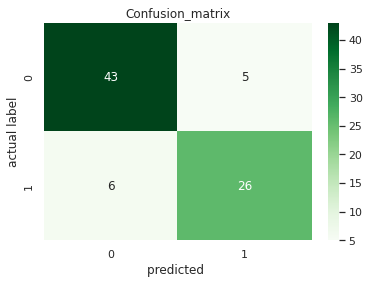

In [76]:
sns.set()

sns.heatmap(data=confusion_mat,annot=True,fmt='d',cmap='Greens')
plt.title('Confusion_matrix')
plt.xlabel('predicted ')
plt.ylabel('actual label')
plt.show()


**Visualising the Training set results**

In [77]:
x_train

,Age,EstimatedSalary
205,47,47000
354,36,99000
3,27,57000
264,48,90000
194,28,89000
...,...,...
299,46,117000
22,48,41000
72,20,23000
15,29,80000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


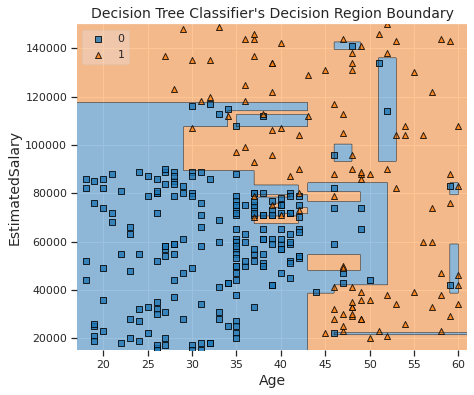

In [80]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(7,6))
plot_decision_regions(np.asarray(x_train),y_train.values,clf=model,legend=2)
plt.xlabel(x.columns[0],size=14)
plt.ylabel(x.columns[1],size=14)
plt.title('Decision Tree Classifier\'s Decision Region Boundary', size=14)
plt.show()

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


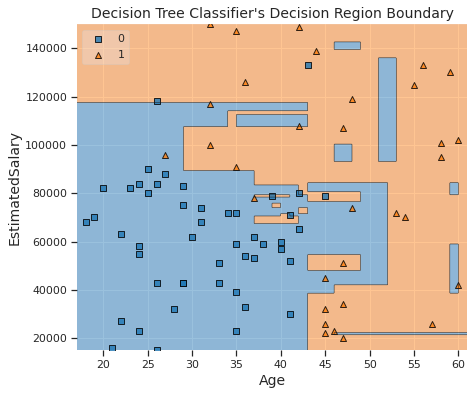

In [81]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(7,6))
plot_decision_regions(np.asarray(x_test),y_test.values,clf=model,legend=2)
plt.xlabel(x.columns[0],size=14)
plt.ylabel(x.columns[1],size=14)
plt.title('Decision Tree Classifier\'s Decision Region Boundary', size=14)
plt.show()